<a href="https://colab.research.google.com/github/marcoantonioafernandes/bootcamp_data_science_aulas/blob/main/Bootcamp_DS_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Módulo 1: Analisando dados da saúde com Python e Pandas

##Aula 1: Aquisição e leitura de dados em tempo real

Vamos começar explorar os dados de gastos hospitalares com o SUS desde 2008

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'

#Ao abrir arquivos brasileiros adicionar a codificação condizente com o arquivo
#o pd.read_csv devolve um dataframe -> https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
full_data = pd.read_csv(url, encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")
full_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [ ]:
#mostrando as últimas 5 linhas
full_data.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83,101374341.51,11958647088.33
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15811477.04,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.42,2498

In [ ]:
#devolve a média por ano
#O resultado dessa operação é uma series, que é equivalente a uma coluna da tabela
full_data.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [ ]:
#Devolve informações da tabela
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [ ]:
#Formatando a saída de floats
pd.options.display.float_format = "{:.2f}".format

In [ ]:
#Valores formatados
full_data.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

In [ ]:
#Média do mês de agosto
full_data["2008/Ago"].mean()

27800320.306666665

Vamos construir nosso primeiro gráfico usando uma função de plotar do pandas

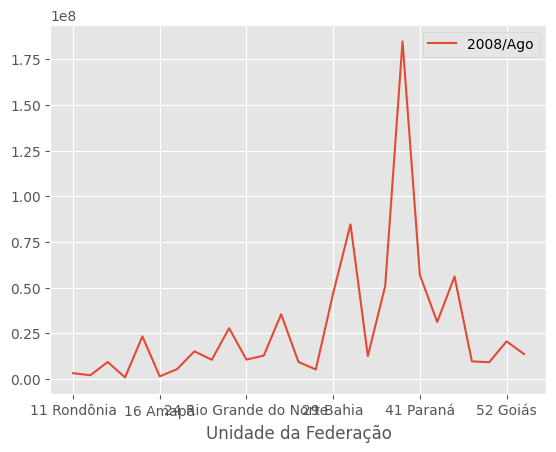

In [ ]:
#Vamos plotar e  especificar os eixos do nosso gráfico
full_data.plot("Unidade da Federação", y="2008/Ago")

O gráfico de linhas é estranho para este tipo de dados que estamos usando. Faria mais sentido utiliza-lo para uma série temporal. 

Vamos tentar plotar utilizando um gráfico de barras.

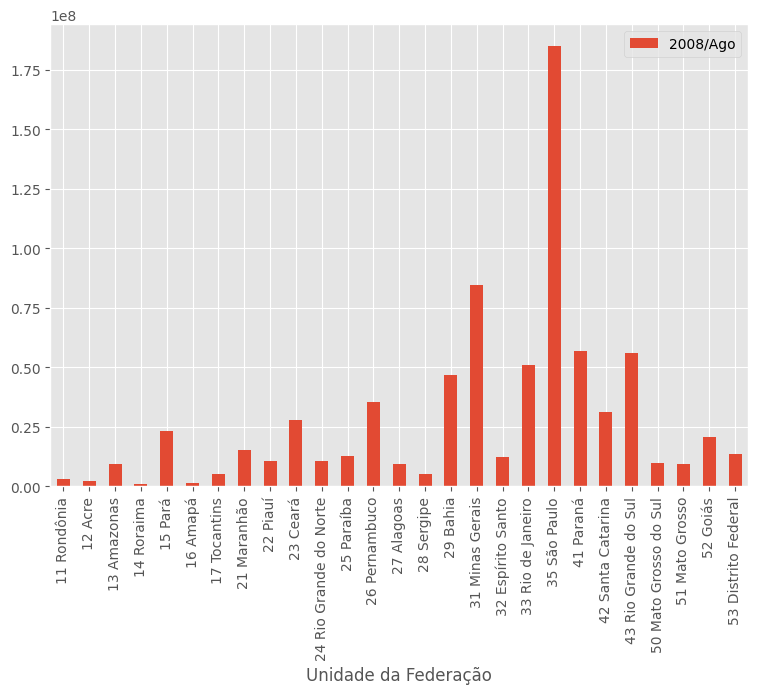

In [ ]:
#Vamos plotar e  especificar os eixos do nosso gráfico
full_data.plot("Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))

Algumas alterações que desejamos fazer no gráfico não são possíveis utilizando apenas o pandas e precisamos utilizar o que roda por de baixo do pandas: o matplotlib

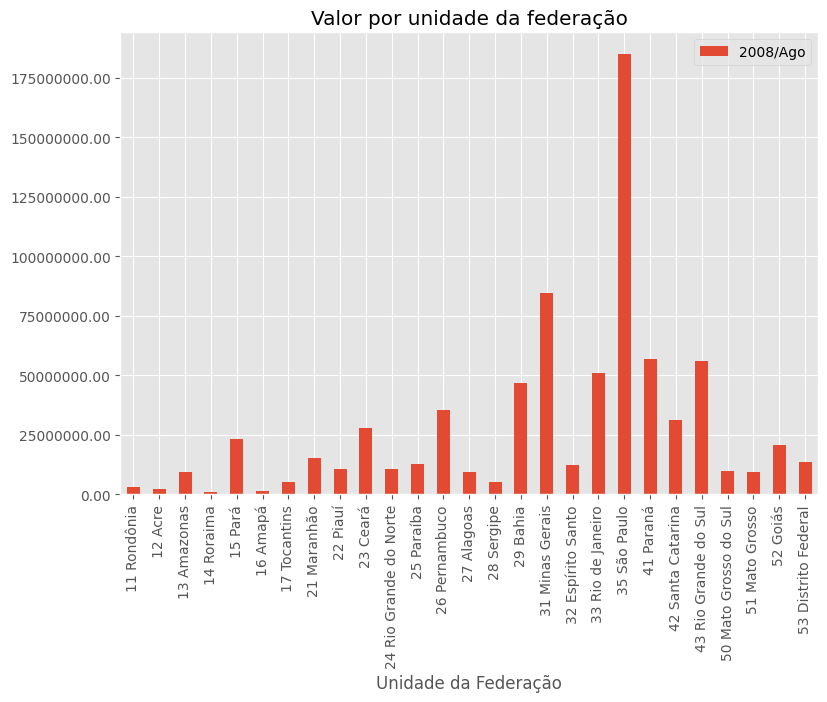

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Quando chamamos o método plot o pandas devolve o controle dos eixos (axis)
ax = full_data.plot("Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))

#Vamos formatar o eixo Y que estã estranho em notação científica
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.title("Valor por unidade da federação")

#String format (python 3) => {x:.2f}
plt.show()

###Desafio 1:

Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [ ]:
#Agosto de 2020 estava com um símbolo ao invés de um número e o substituímos por 0 para plotarmos o gráfico.
full_data["2020/Ago"] = full_data["2020/Ago"].replace("-", 0).astype(float)
full_data["2020/Ago"]

0     10285455.78
1            0.00
2     14726443.67
3      2826486.18
4     39911193.02
5      2942273.94
6      8240261.38
7     28587541.78
8     23210624.20
9     59808605.59
10    24929930.72
11    22130016.81
12    75704177.72
13    19754741.78
14    11014180.89
15    80793117.08
16   168024412.95
17    32188873.88
18    95274486.35
19   346512263.17
20   129375911.54
21    63972379.36
22   101374341.51
23    19241624.02
24    17790649.87
25    43984702.05
26    26526196.39
Name: 2020/Ago, dtype: float64

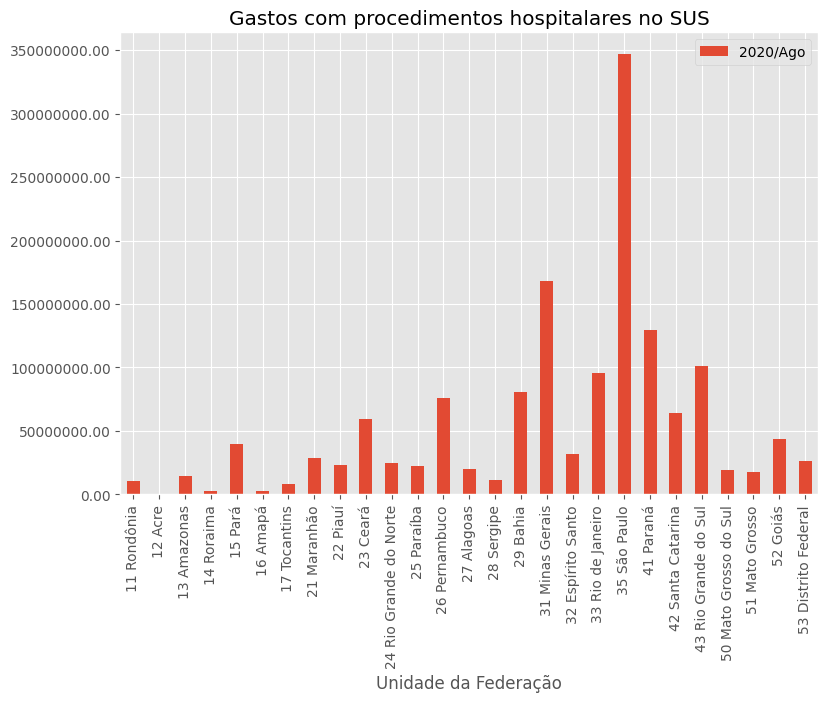

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Quando chamamos o método plot o pandas devolve o controle dos eixos (axis)
ax = full_data.plot("Unidade da Federação", y="2020/Ago", kind="bar", figsize=(9,6))

#Vamos formatar o eixo Y que estã estranho em notação científica
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
plt.title("Gastos com procedimentos hospitalares no SUS")
plt.show()

#String format (python 3) => {x:.2f}

##Aula 2: Primeiras visualizações de dados

In [ ]:
#Estamos fazendo slices no nosso DF
full_data[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,3231494.61,3117178.63
1,2089107.14,2275708.53
2,9352532.70,9363099.35
3,894271.18,910424.17
4,23341218.03,25172261.32


In [ ]:
#Devolve apenas a média das colunas que tem todos os valores preenchidos
full_data.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
2020/Ago     54412255.25
Total      5993731798.30
Length: 152, dtype: float64

In [ ]:
#Portanto vamos usar apenas as colunas que tem todos os valores preenchidos
#Dependendo do contexto vamos utilizar outras estratégias sobre o que fazer com dados faltantes.
util_columns = full_data.mean().index

#O index é uma série IMUTÁVEL, portanto se tentarmos inserir um valor não funcionará
util_columns.insert(0, "Unidade da Federação")

util_columns = full_data.mean().index.tolist()
util_columns.insert(0, "Unidade da Federação")

util_columns[:5]

['Unidade da Federação', '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr']

In [ ]:
util_data = full_data[util_columns]

In [ ]:
util_data = util_data.set_index("Unidade da Federação")
util_data

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,0.00,420668039.63
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,...,2

In [ ]:
#.loc devolve os valores da linha pelo index
util_data.loc["12 Acre"]

2008/Jan      902416.00
2008/Fev     1497206.26
2008/Mar     1794028.48
2008/Abr     1730469.42
2008/Mai     1819443.92
               ...     
2020/Mai     2896340.24
2020/Jun     3045245.80
2020/Jul     3915193.20
2020/Ago           0.00
Total      420668039.63
Name: 12 Acre, Length: 152, dtype: float64

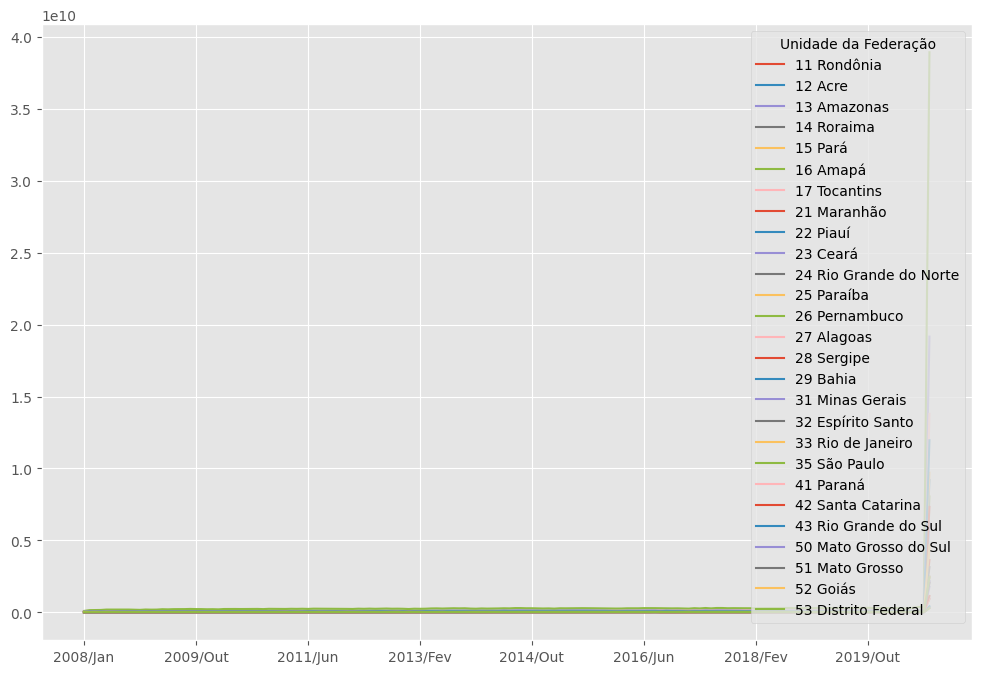

In [ ]:
util_data.T.plot(figsize=(12,8))

Por que o gráfico acima fica próximo de zero o tempo todo e no final tem um salto enorme?

In [ ]:
# Linha total
util_data.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Mai,7652120.28,2896340.24,19658585.46,2752228.26,32617541.05,2065055.35,6697839.73,30512523.70,12658280.69,46197393.28,19443923.12,14923484.69,58837630.45,14409211.16,8026929.31,64010810.67,133388804.72,29020427.51,85094073.33,272486957.70,107503816.77,55111547.06,82381774.95,17913161.92,13604225.34,34305180.56,19058243.91
2020/Jun,8725530.68,3045245.80,20897542.93,3401864.29,41625331.28,2009912.57,7384806.71,33099356.79,14547134.38,54409441.05,21466739.79,17332974.95,63987469.53,15401094.32,8057935.10,69567655.48,139699763.30,28942645.28,91507444.94,306425499.30,96977288.37,54457911.56,86051002.13,17331445.92,13151005.63,35701473.15,22704335.27
2020/Jul,11152107.08,3915193.20,19346450.18,3015488.30,38438873.79,3249565.87,9131707.60,32936503.37,17871598.61,55180751.48,26302373.94,26902438.72,74192800.58,18351680.84,10313262.56,83992134.91,164891823.64,33290880.33,98722687.54,366721243.71,109658360.43,63467828.84,100531035.83,18755557.92,16371639.49,39405050.36,25269773.34
2020/Ago,10285455.78,0.00,14726443.67,2826486.18,39911193.02,2942273.94,8240261.38,28587541.78,23210624.20,59808605.59,24929930.72,22130016.81,75704177.72,19754741.78,11014180.89,80793117.08,168024412.95,32188873.88,95274486.35,346512263.17,129375911.54,63972379.36,101374341.51,19241624.02,17790649.87,43984702.05,26526196.39
Total,929129659.72,420668039.63,1771654871.23,305010883.18,4437115730.71,291637984.75,999998621.85,3632860959.84,2130616492.35,6197357245.98,2477372149.60,2470550104.25,8046954289.39,2104405303.11,1130337049.71,9193802684.16,19160106499.88,3139189177.73,9696364115.11,38929549655.89,13786964617.27,7324100054.96,11958647088.33,2172157981.36,2036923784.59,4657350310.70,2429933198.76


In [ ]:
#Vamos resolver a linha total
#axis = 0 coluna - axis = 1 linha
util_data = util_data.drop("Total", axis=1)

In [ ]:
#Definindo o estilo dos gráficos como o padrão do matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')

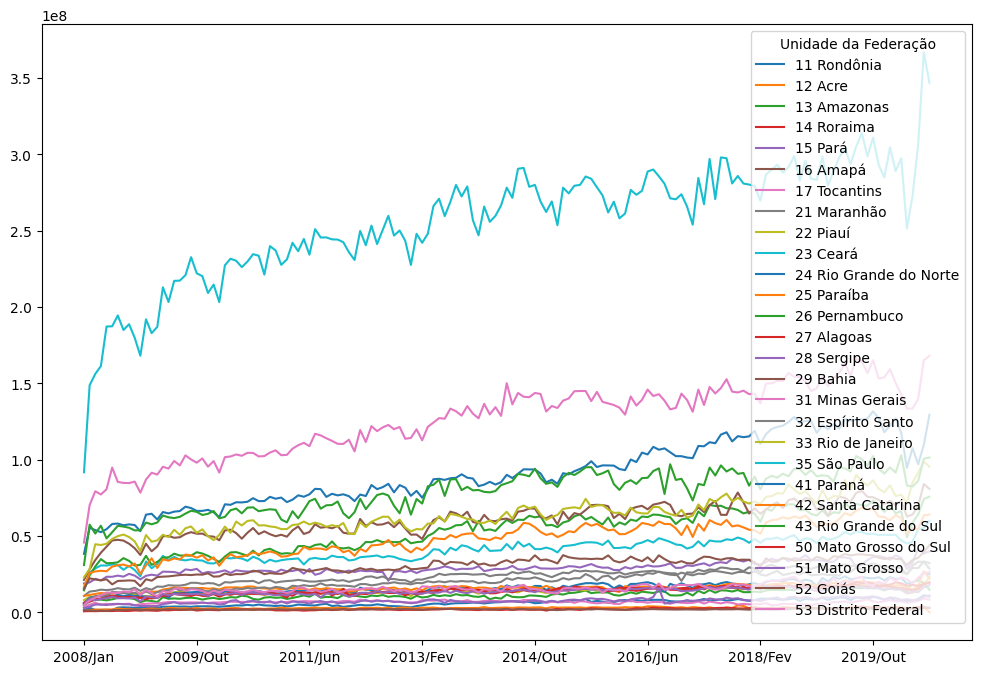

In [ ]:
util_data.T.plot(figsize=(12,8))

###Desafio 2:
Reposicionar a legenda do gráfico em uma posição mais adequada

Plotar o gráfico de linha com apenas 5 estados de sua preferência

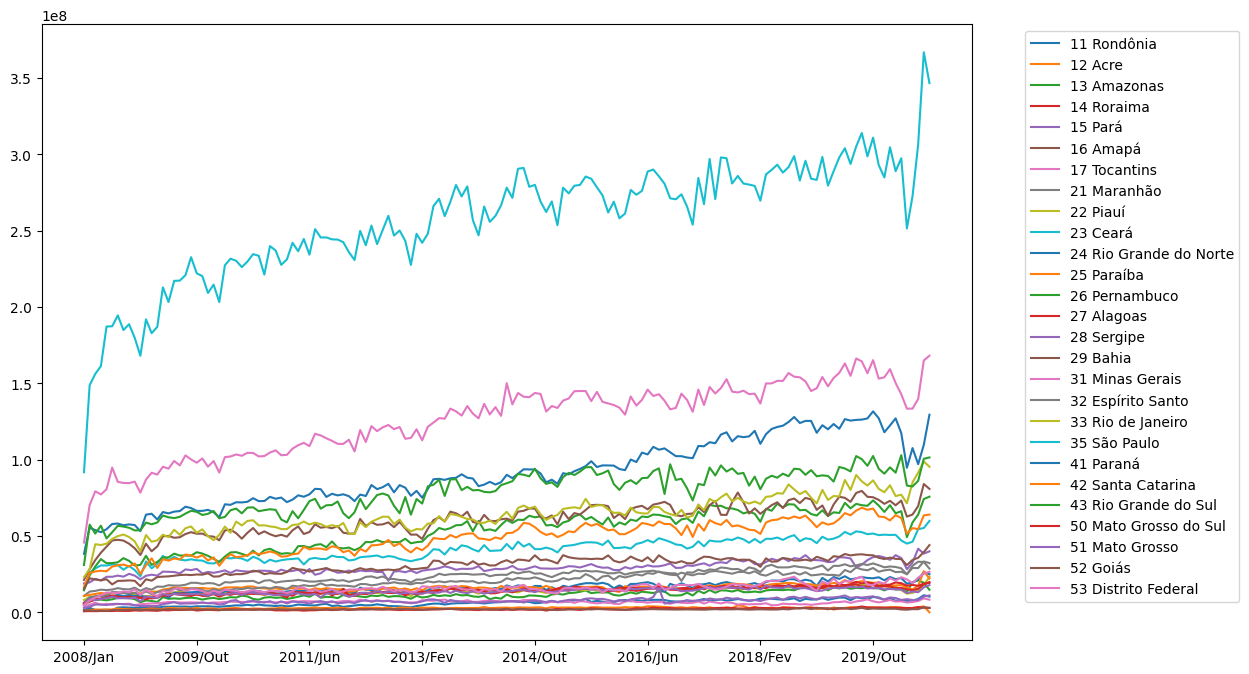

In [ ]:
util_data.T.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

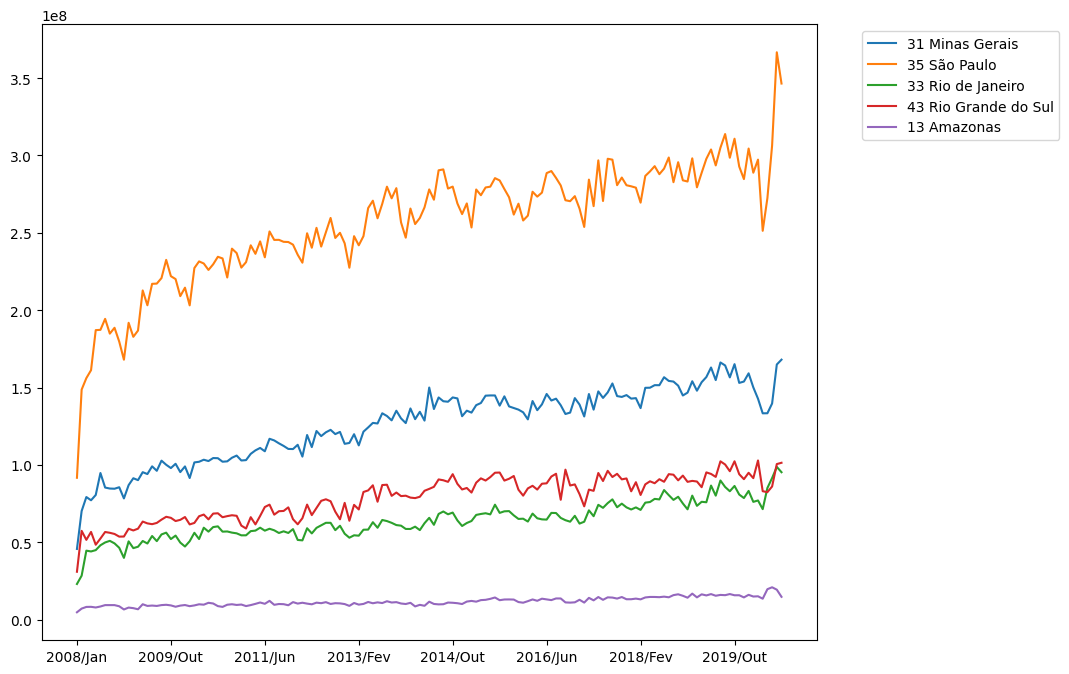

In [ ]:
states = ["31 Minas Gerais", "35 São Paulo", "33 Rio de Janeiro", "43 Rio Grande do Sul", "13 Amazonas"]
ax = util_data.loc[states].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Criando uma cópia do dataset e ordenando por total

In [ ]:
data_ordered_by_total = util_data.copy()
data_ordered_by_total["total"] = util_data.sum(axis=1).sort_values(ascending=False)
data_ordered_by_total = data_ordered_by_total.sort_values(by="total", ascending=False)
data_ordered_by_total.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,244464657.96,...,270596412.47,297881361.74,297309345.90,280813753.04,285740593.74,280768835.63,280080500.10,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71,346512263.17,38709256682.23
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,110963598.17,...,143284103.88,146849636.29,152645703.34,144488574.05,143939472.31,145123339.34,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64,168024412.95,19063195424.50
41 Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,75660652.68,...,110695749.67,116359245.54,117872309.11,111878379.52,115332028.47,114669021.47,115173908.32,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126954366.08,131578320.06,127090701.66,117896293.89,122349509.69,127000113.31,117308075.66,94599403.51,107503816.77,96977288.37,109658360.43,129375911.54,13721120792.54
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,5667333

##Aula 3: Manipulação de dados

Vamos selecionar os 5 estados que mais gastam

In [ ]:
selected_states = util_data.sum(axis=1).sort_values(ascending=False)[:5].index
selected_states

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro'],
      dtype='object', name='Unidade da Federação')

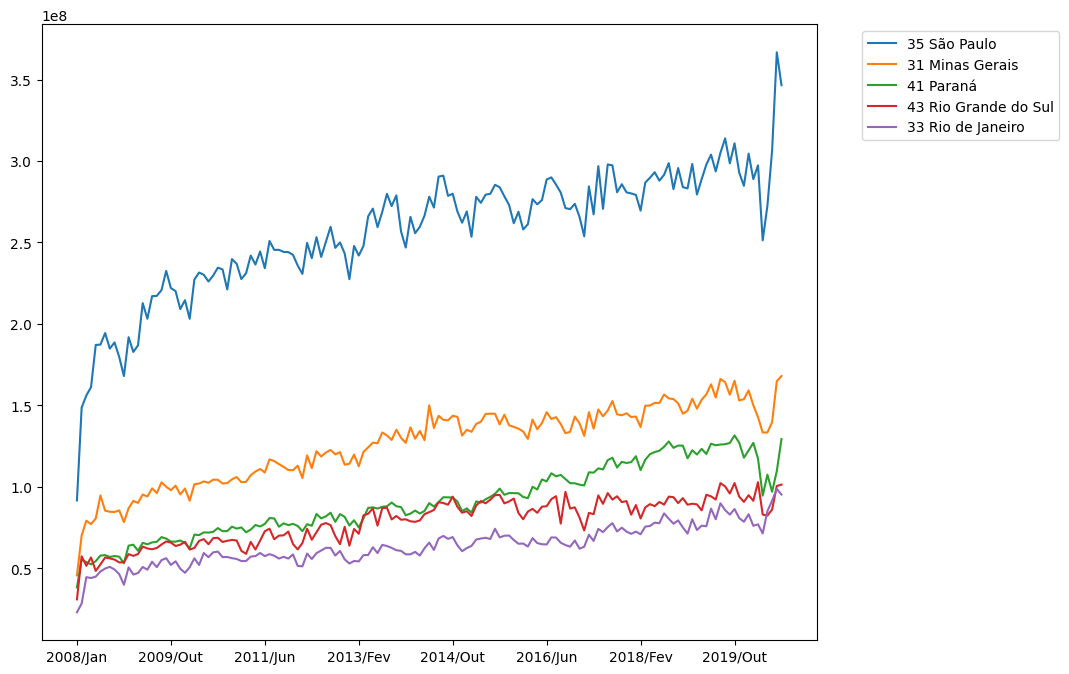

In [ ]:
util_data.loc[selected_states].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

Selecionar 7 estados aleatórios

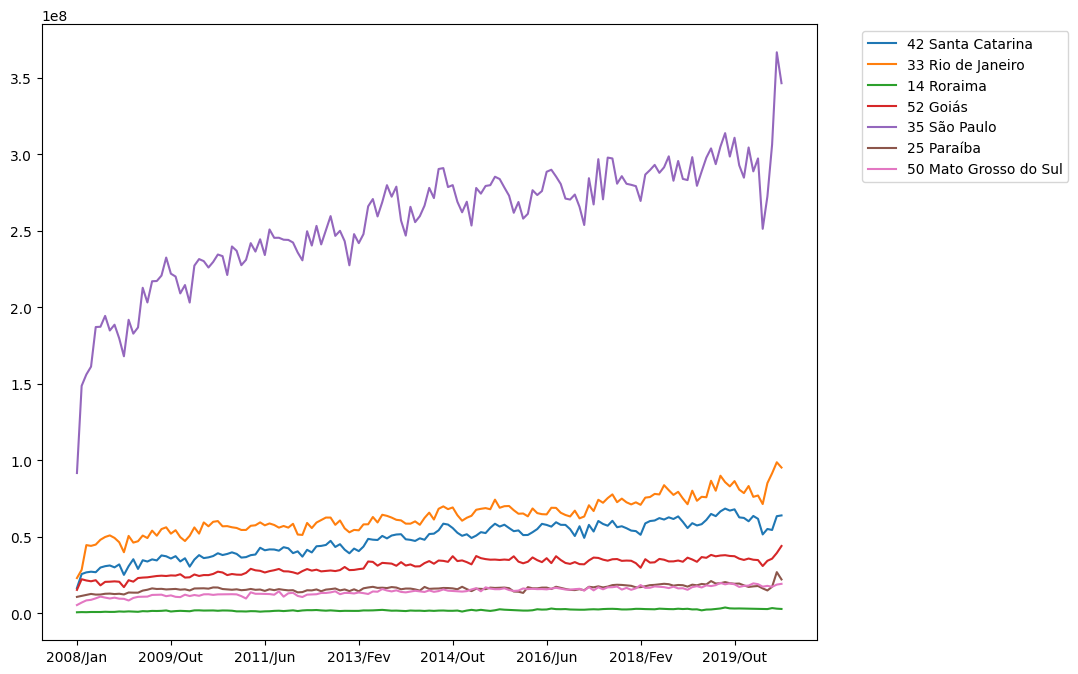

In [ ]:
util_data.sample(n=7).T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

O computador faz um cáculo matemático baseado em um valor inicial para definir a pseudo aleatoriedade da amostra. Podemos definir esse valor inicial e sempre obter os mesmos valores. Esse valor inicial varia durante o tempo para manter a pseudo aleatoriedade.

In [ ]:
import numpy as np

seed = 687942

np.random.seed(seed)
util_data.sample(n=7)

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,5456723.98,9102212.86,10249595.97,11253833.56,10198619.17,13364258.29,13035374.08,12588595.77,12727433.30,12656039.16,11456719.61,13797101.01,11872595.72,13159401.04,14112825.59,14441001.76,15869485.76,14289482.15,14759638.93,15682021.10,15580269.47,14614727.18,13389707.31,15195270.91,14089292.07,14860459.56,14590678.01,15551855.16,15094272.62,15891427.56,15427295.84,16004656.88,16310380.44,15484092.44,16640338.44,16133664.94,15161413.45,17382070.61,16934270.53,17758849.96,...,26638696.23,27029630.04,26530798.94,25867248.28,25262466.33,26309234.34,26485310.14,25493804.70,26870384.24,24762482.38,23992070.32,25580754.91,27047091.49,24431385.84,25130378.43,26009340.50,24685731.90,26243877.36,24170075.47,24502056.39,25005409.89,24433360.41,24489441.43,23966073.21,27678894.71,26257287.18,29321032.62,28080023.93,27494948.06,28981301.17,26560507.36,27447261.00,27904907.76,26290107.37,26533465.80,25035646.74,29020427.51,28942645.28,33290880.33,32188873.88
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,110963598.17,...,147516450.71,143284103.88,146849636.29,152645703.34,144488574.05,143939472.31,145123339.34,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64,168024412.95
24 Rio Grande do Norte,5947814.08,9509755.83,10352238.59,10855108.50,11160168.19,10475071.38,11386349.96,10640817.47,11336030.28,10606465.07,10742812.44,10091048.76,9571714.81,10699503.66,11613016.25,9515920.85,12872004.45,12353310.44,12888827.03,13075400.99,13294634.31,13153593.04,13652544.87,12942505.99,12272024.78,13763300.23,13693244.07,13975281.25,12960918.44,13077509.32,14081550.96,13930180.98,13010354.42,12796805.21,13667927.81,13356719.54,13551289.90,14108465.83,13871428.09,14155263.87,...,19111034.24,17755044.87,19054889.16,19795966.53,18795259.74,18444347.90,17298003.50,18311840.01,19130570.55,17631343.47,19842834.93,20774806.62,20789038.18,20137699.72,21652391.73,21629797.35,20189873.01,21332372.73,20581258.13,17227874.04,22503704.70,20181547.44,23086510.42,21820682.35,23588813.89,21530220.97,22229779.85,23120838.46,22455827.10,22262560.18,22920328.67,20947198.83,23095504.81,21643039.57,22434026.56,18738178.92,19443923.12,21466739.79,26302373.94,24929930.72
17 Tocantins,3441592.69,4985688.85,6205612.60,4984482.09,5511002.46,4927934.22,5445602.28,5413710.38,5596669.50,4658414.01,5252451.80,5523443.70,5791656.63,5814388.89,62739

##Desafio 3:
Desafio 01: Escolher uma palete de cores mais adequada do matplotlib. (https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) (https://matplotlib.org/stable/tutorials/colors/colormaps.html)


Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

**Resolução desafio 01:** Escolher uma palete de cores mais adequada do matplotlib.

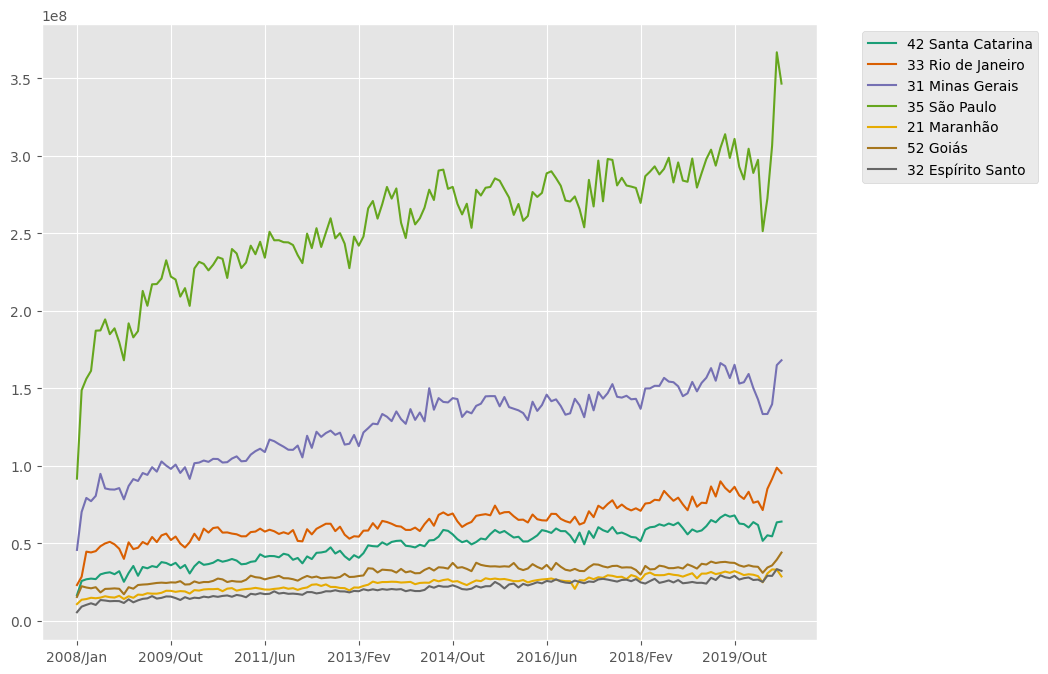

In [ ]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')

colors = ['r', 'g', 'b', 'c', 'm', 'y']
# util_data.sample(n=7).T.plot(figsize=(10,8), color=colors)
util_data.sample(n=7).T.plot(figsize=(10,8), cmap="Dark2")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

**Resolução desafio 02:** Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.


In [ ]:
region_column_values = [
                        "Norte", "Norte", "Norte", "Norte", "Norte", "Norte", "Norte",
                        "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", "Nordeste", 
                        "Sudeste", "Sudeste", "Sudeste", "Sudeste",
                        "Sul", "Sul", "Sul", 
                        "Centro-Oeste", "Centro-Oeste", "Centro-Oeste", "Centro-Oeste"
]

data_by_region = util_data.copy()
data_by_region["Regiao"] = region_column_values
data_by_region.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,4769347.86,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,Norte
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,2723636.56,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,0.00,Norte
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,11061892.22,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,Norte
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,1067658.62,...,2755620.24,2878177.60,

**Resolução desafio 03:** Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

Removendo a coluna de total

In [ ]:
remove_total_columns = data_ordered_by_total.columns[:len(data_ordered_by_total.columns)-1]

Criando um formatador de valores

In [ ]:
#Criando um formatador personalizado para o eixo y dos gráficos
def formatter(x, pos):
    s = '{:,.0f}'.format(x / 1000000.0)
    return s

Definindo valores que serão apresentados no eixo x

In [ ]:
x_ticks = data_ordered_by_total[remove_total_columns].columns[0::12]
x_ticks_indexes = list(range(0, len(data_ordered_by_total[remove_total_columns].columns), 12))
x_ticks

Index(['2008/Jan', '2009/Jan', '2010/Fev', '2011/Fev', '2012/Fev', '2013/Fev',
       '2014/Fev', '2015/Fev', '2016/Fev', '2017/Fev', '2018/Fev', '2019/Fev',
       '2020/Fev'],
      dtype='object')

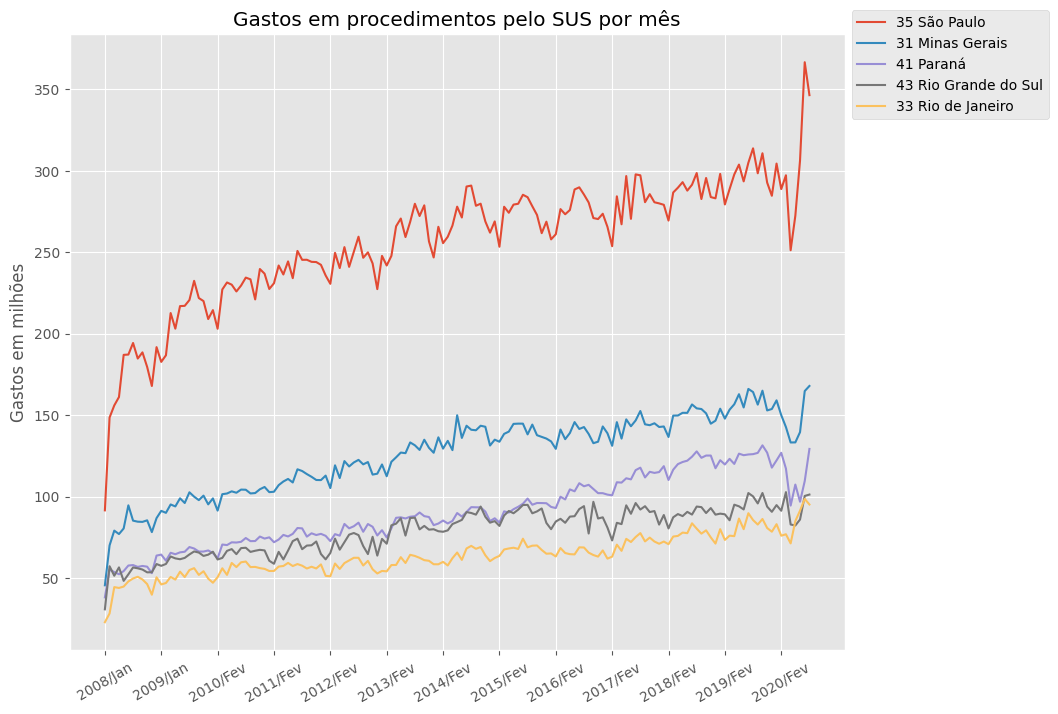

In [ ]:
ax = data_ordered_by_total[remove_total_columns].head(5).T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.ylabel("Gastos em milhões")
plt.title("Gastos em procedimentos pelo SUS por mês")
plt.xticks(x_ticks_indexes, x_ticks)
plt.xticks(rotation=30)
plt.show()

Resolução dos desafios: 
**Desafio 04:** Adicione o seu estado aos 5 estados plotados anteriormente (meu estado já consta nos maiores gastos)

**Desafio 05: **Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Para fazer a análise do desafio 05 vamos utilizar o estado de Minas Gerais, que é o meu estado e sofre anualmente com surtos de dengue, e verificar se alguns picos no gráfico tem haver com os surtos de dengue

Selecionando as colunas a partir de janeiro de 2014 que é onde inicia nosso dataset dos casos de dengue no Brasil

In [ ]:
selected_columns = util_data.columns[71:143]
selected_columns

Index(['2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun',
       '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez',
       '2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun',
       '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez',
       '2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun',
       '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez',
       '2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/Jun',
       '2017/Jul', '2017/Ago', '2017/Set', '2017/Out', '2017/Nov', '2017/Dez',
       '2018/Jan', '2018/Fev', '2018/Mar', '2018/Abr', '2018/Mai', '2018/Jun',
       '2018/Jul', '2018/Ago', '2018/Set', '2018/Out', '2018/Nov', '2018/Dez',
       '2019/Jan', '2019/Fev', '2019/Mar', '2019/Abr', '2019/Mai', '2019/Jun',
       '2019/Jul', '2019/Ago', '2019/Set', '2019/Out', '2019/Nov', '2019/Dez'],
      dtype='object')

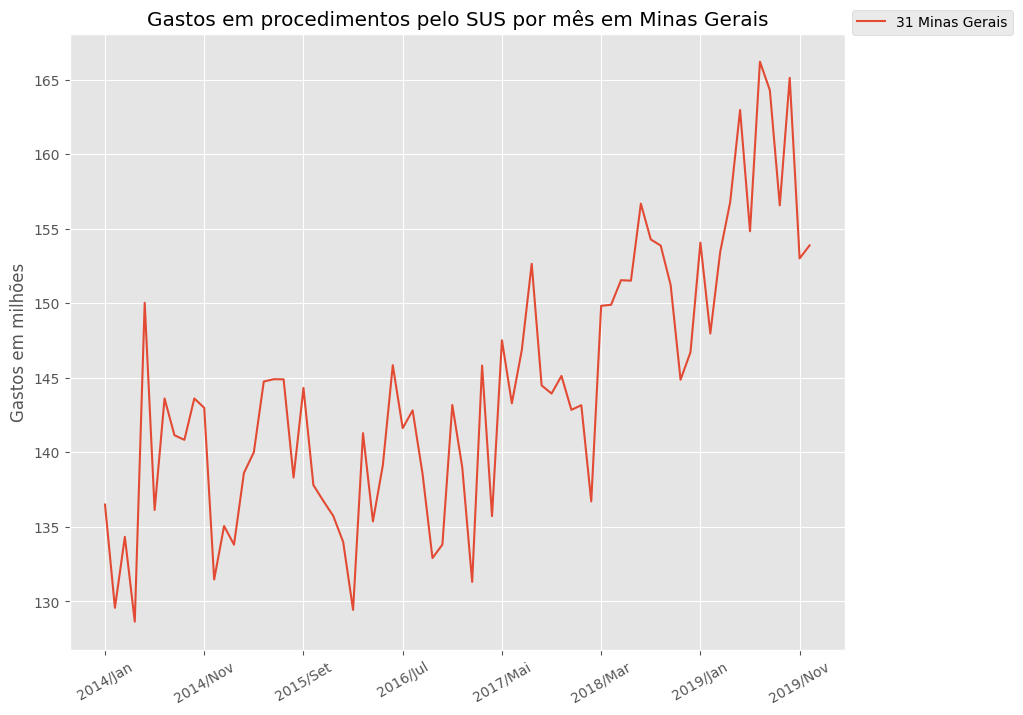

In [ ]:
ax = util_data[selected_columns].loc['31 Minas Gerais'].T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.ylabel("Gastos em milhões")
plt.title("Gastos em procedimentos pelo SUS por mês em Minas Gerais")
plt.xticks(rotation=30)
plt.show()

Carregando os casos de dengue desde 2014

In [ ]:
dengue_data = pd.read_csv('/content/casos_dengue.csv', sep=";")
dengue_data.head()

,UF de notificação,jan/14,fev/14,mar/14,abr/14,mai/14,jun/14,jul/14,ago/14,set/14,out/14,nov/14,dez/14,jan/15,fev/15,mar/15,abr/15,mai/15,jun/15,jul/15,ago/15,set/15,out/15,nov/15,dez/15,jan/16,fev/16,mar/16,abr/16,mai/16,jun/16,jul/16,ago/16,set/16,out/16,nov/16,dez/16,jan/17,fev/17,mar/17,abr/17,mai/17,jun/17,jul/17,ago/17,set/17,out/17,nov/17,dez/17,jan/18,fev/18,mar/18,abr/18,mai/18,jun/18,jul/18,ago/18,set/18,out/18,nov/18,dez/18,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19
0,11 Rondônia,200,245,257,177,182,136,82,68,53,117,307,197,153,179,269,285,192,129,90,50,62,139,188,514,1714,2273,1720,842,291,115,112,30,40,43,155,574,583,511,427,155,100,67,36,54,47,43,77,94,94,78,46,61,68,29,30,27,17,36,34,19,32,43,50,89,65,85,130,80,25,65,114,205
1,12 Acre,330,129,205,293,436,432,611,1679,7091,8058,5628,3765,2333,1451,916,323,219,173,83,41,63,67,71,149,326,779,377,228,107,69,68,46,43,42,64,101,288,252,215,162,90,65,50,60,37,113,214,338,493,408,394,317,326,202,186,223,434,1162,1832,1306,1710,1219,866,496,318,157,137,174,145,598,2014,2265
2,13 Amazonas,933,980,1098,1087,573,357,251,228,197,135,228,292,389,421,593,461,366,285,216,182,169,169,123,287,423,914,1328,1704,998,773,384,228,163,175,221,195,504,597,592,548,291,213,187,261,275,151,135,145,258,265,331,309,220,187,173,164,121,119,95,83,221,207,151,136,128,97,57,47,101,464,908,1356
3,14 Roraima,83,50,63,71,93,128,124,142,126,95,66,99,87,62,67,93,100,135,147,184,156,41,12,24,11,14,49,10,9,8,15,35,25,15,11,8,14,9,33,33,56,42,39,23,13,9,7,6,1,-,2,1,2,5,14,28,10,23,12,13,31,27,58,55,74,59,54,76,156,250,439,312
4,15 Pará,538,645,692,616,494,255,196,157,212,293,220,253,309,580,1279,984,936,627,426,556,500,419,445,794,1258,2188,2114,1714,1108,517,401,346,262,287,267,409,1670,2157,1576,572,465,227,177,271,136,197,192,186,262,412,739,650,440,251,135,257,152,101,150,226,532,820,770,753,724,363,207,225,270,252,284,180


Algumas célular vieram com o valor -. Substituímos por 0 por não terem casos notificados naquela UF naquele mês.

In [ ]:
dengue_data = dengue_data.set_index("UF de notificação")
dengue_data.head()

,jan/14,fev/14,mar/14,abr/14,mai/14,jun/14,jul/14,ago/14,set/14,out/14,nov/14,dez/14,jan/15,fev/15,mar/15,abr/15,mai/15,jun/15,jul/15,ago/15,set/15,out/15,nov/15,dez/15,jan/16,fev/16,mar/16,abr/16,mai/16,jun/16,jul/16,ago/16,set/16,out/16,nov/16,dez/16,jan/17,fev/17,mar/17,abr/17,mai/17,jun/17,jul/17,ago/17,set/17,out/17,nov/17,dez/17,jan/18,fev/18,mar/18,abr/18,mai/18,jun/18,jul/18,ago/18,set/18,out/18,nov/18,dez/18,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19
UF de notificação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,200,245,257,177,182,136,82,68,53,117,307,197,153,179,269,285,192,129,90,50,62,139,188,514,1714,2273,1720,842,291,115,112,30,40,43,155,574,583,511,427,155,100,67,36,54,47,43,77,94,94,78,46,61,68,29,30,27,17,36,34,19,32,43,50,89,65,85,130,80,25,65,114,205
12 Acre,330,129,205,293,436,432,611,1679,7091,8058,5628,3765,2333,1451,916,323,219,173,83,41,63,67,71,149,326,779,377,228,107,69,68,46,43,42,64,101,288,252,215,162,90,65,50,60,37,113,214,338,493,408,394,317,326,202,186,223,434,1162,1832,1306,1710,1219,866,496,318,157,137,174,145,598,2014,2265
13 Amazonas,933,980,1098,1087,573,357,251,228,197,135,228,292,389,421,593,461,366,285,216,182,169,169,123,287,423,914,1328,1704,998,773,384,228,163,175,221,195,504,597,592,548,291,213,187,261,275,151,135,145,258,265,331,309,220,187,173,164,121,119,95,83,221,207,151,136,128,97,57,47,101,464,908,1356
14 Roraima,83,50,63,71,93,128,124,142,126,95,66,99,87,62,67,93,100,135,147,184,156,41,12,24,11,14,49,10,9,8,15,35,25,15,11,8,14,9,33,33,56,42,39,23,13,9,7,6,1,-,2,1,2,5,14,28,10,23,12,13,31,27,58,55,74,59,54,76,156,250,439,312
15 Pará,538,645,692,616,494,255,196,157,212,293,220,253,309,580,1279,984,936,627,426,556,500,419,445,794,1258,2188,2114,1714,1108,517,401,346,262,287,267,409,1670,2157,1576,572,465,227,177,271,136,197,192,186,262,412,739,650,440,251,135,257,152,101,150,226,532,820,770,753,724,363,207,225,270,252,284,180


In [ ]:
dengue_data = dengue_data.replace("-", 0)
dengue_data = dengue_data.astype(float)
dengue_data.head()

,jan/14,fev/14,mar/14,abr/14,mai/14,jun/14,jul/14,ago/14,set/14,out/14,nov/14,dez/14,jan/15,fev/15,mar/15,abr/15,mai/15,jun/15,jul/15,ago/15,set/15,out/15,nov/15,dez/15,jan/16,fev/16,mar/16,abr/16,mai/16,jun/16,jul/16,ago/16,set/16,out/16,nov/16,dez/16,jan/17,fev/17,mar/17,abr/17,mai/17,jun/17,jul/17,ago/17,set/17,out/17,nov/17,dez/17,jan/18,fev/18,mar/18,abr/18,mai/18,jun/18,jul/18,ago/18,set/18,out/18,nov/18,dez/18,jan/19,fev/19,mar/19,abr/19,mai/19,jun/19,jul/19,ago/19,set/19,out/19,nov/19,dez/19
UF de notificação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,200.00,245.00,257.00,177.00,182.00,136.00,82.00,68.00,53.00,117.00,307.00,197.00,153.00,179.00,269.00,285.00,192.00,129.00,90.00,50.00,62.00,139.00,188.00,514.00,1714.00,2273.00,1720.00,842.00,291.00,115.00,112.00,30.00,40.00,43.00,155.00,574.00,583.00,511.00,427.00,155.00,100.00,67.00,36.00,54.00,47.00,43.00,77.00,94.00,94.00,78.00,46.00,61.00,68.00,29.00,30.00,27.00,17.00,36.00,34.00,19.00,32.00,43.00,50.00,89.00,65.00,85.00,130.00,80.00,25.00,65.00,114.00,205.00
12 Acre,330.00,129.00,205.00,293.00,436.00,432.00,611.00,1679.00,7091.00,8058.00,5628.00,3765.00,2333.00,1451.00,916.00,323.00,219.00,173.00,83.00,41.00,63.00,67.00,71.00,149.00,326.00,779.00,377.00,228.00,107.00,69.00,68.00,46.00,43.00,42.00,64.00,101.00,288.00,252.00,215.00,162.00,90.00,65.00,50.00,60.00,37.00,113.00,214.00,338.00,493.00,408.00,394.00,317.00,326.00,202.00,186.00,223.00,434.00,1162.00,1832.00,1306.00,1710.00,1219.00,866.00,496.00,318.00,157.00,137.00,174.00,145.00,598.00,2014.00,2265.00
13 Amazonas,933.00,980.00,1098.00,1087.00,573.00,357.00,251.00,228.00,197.00,135.00,228.00,292.00,389.00,421.00,593.00,461.00,366.00,285.00,216.00,182.00,169.00,169.00,123.00,287.00,423.00,914.00,1328.00,1704.00,998.00,773.00,384.00,228.00,163.00,175.00,221.00,195.00,504.00,597.00,592.00,548.00,291.00,213.00,187.00,261.00,275.00,151.00,135.00,145.00,258.00,265.00,331.00,309.00,220.00,187.00,173.00,164.00,121.00,119.00,95.00,83.00,221.00,207.00,151.00,136.00,128.00,97.00,57.00,47.00,101.00,464.00,908.00,1356.00
14 Roraima,83.00,50.00,63.00,71.00,93.00,128.00,124.00,142.00,126.00,95.00,66.00,99.00,87.00,62.00,67.00,93.00,100.00,135.00,147.00,184.00,156.00,41.00,12.00,24.00,11.00,14.00,49.00,10.00,9.00,8.00,15.00,35.00,25.00,15.00,11.00,8.00,14.00,9.00,33.00,33.00,56.00,42.00,39.00,23.00,13.00,9.00,7.00,6.00,1.00,0.00,2.00,1.00,2.00,5.00,14.00,28.00,10.00,23.00,12.00,13.00,31.00,27.00,58.00,55.00,74.00,59.00,54.00,76.00,156.00,250.00,439.00,312.00
15 Pará,538.00,645.00,692.00,616.00,494.00,255.00,196.00,157.00,212.00,293.00,220.00,253.00,309.00,580.00,1279.00,984.00,936.00,627.00,426.00,556.00,500.00,419.00,445.00,794.00,1258.00,2188.00,2114.00,1714.00,1108.00,517.00,401.00,346.00,262.00,287.00,267.00,409.00,1670.00,2157.00,1576.00,572.00,465.00,227.00,177.00,271.00,136.00,197.00,192.00,186.00,262.00,412.00,739.00,650.00,440.00,251.00,135.00,257.00,152.00,101.00,150.00,226.00,532.00,820.00,770.00,753.00,724.00,363.00,207.00,225.00,270.00,252.00,284.00,180.00


Vamos plotar o gráfico de Minas Gerais para a comparação

In [ ]:
dengue_data_columns_position = list(range(0, len(dengue_data.columns), 12))
dengue_data_labels = dengue_data.columns[::12]

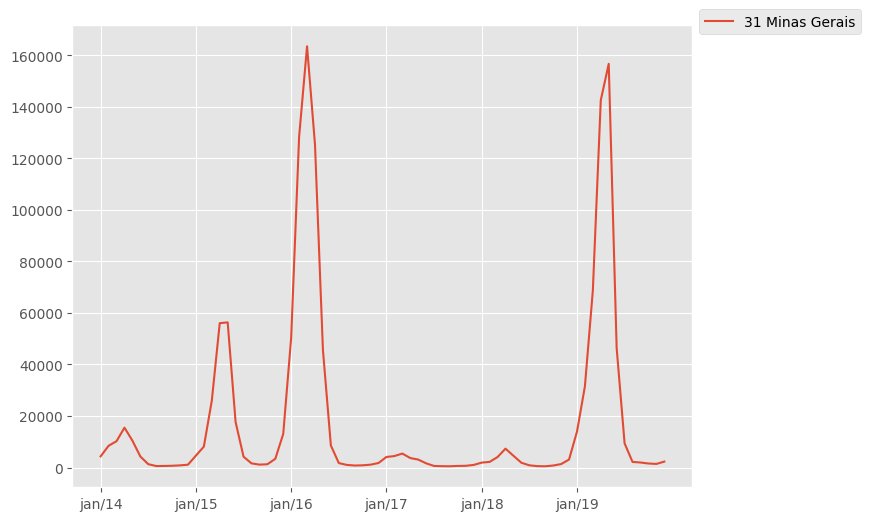

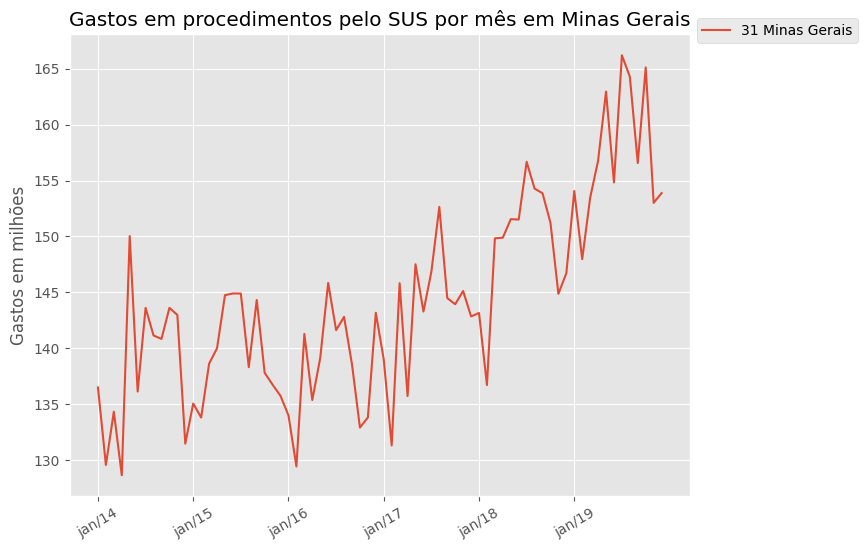

In [ ]:
ax = dengue_data.loc["31 Minas Gerais"].plot(figsize=(8,6))

plt.legend(bbox_to_anchor=(1, 1.05), loc="upper left")
plt.xticks(dengue_data_columns_position, dengue_data_labels)
plt.show()

ax = util_data[selected_columns].loc['31 Minas Gerais'].T.plot(figsize=(8,6))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.ylabel("Gastos em milhões")
plt.title("Gastos em procedimentos pelo SUS por mês em Minas Gerais")
plt.xticks(dengue_data_columns_position, dengue_data_labels)
plt.xticks(rotation=30)
plt.show()

Acima podemos notar que nos períodos onde houve um grande aumento no número de casos de dengue no estado de Minas Gerais, também houve aumento nos gastos em procedimentos pelo SUS.

**Desafio 06: ** Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região


In [ ]:
southeast_regions = ["31 Minas Gerais", "32 Espírito Santo", "33 Rio de Janeiro", "35 São Paulo"]
selected_months = util_data.columns[30:100]
selected_months

Index(['2010/Ago', '2010/Set', '2010/Out', '2010/Nov', '2010/Dez', '2011/Jan',
       '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul',
       '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez', '2012/Jan',
       '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul',
       '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez', '2013/Jan',
       '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul',
       '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez', '2014/Jan',
       '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul',
       '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez', '2015/Jan',
       '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul',
       '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez', '2016/Jan',
       '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai'],
      dtype='object')

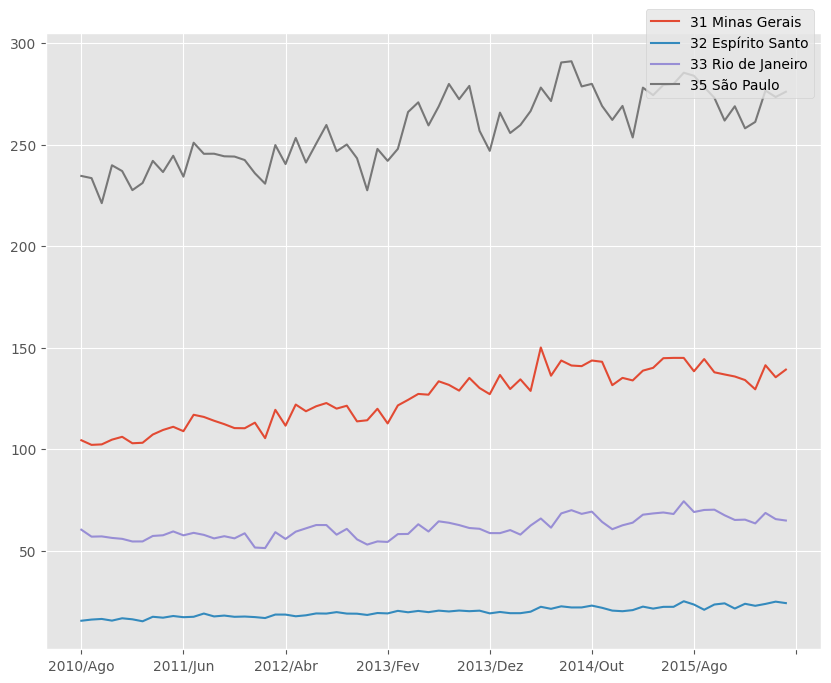

In [ ]:
ax = util_data[selected_months].loc[southeast_regions].T.plot(figsize=(10,8))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper right")
plt.show()

Não é possível reparar em picos no mês de fev/2013 na região sudeste

##Aula 4: Análise de gráficos e criação de hipóteses

In [ ]:
data_ordered_by_total.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,244464657.96,...,270596412.47,297881361.74,297309345.90,280813753.04,285740593.74,280768835.63,280080500.10,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304505286.22,288872273.89,297335842.20,251320040.41,272486957.70,306425499.30,366721243.71,346512263.17,38709256682.23
31 Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,110963598.17,...,143284103.88,146849636.29,152645703.34,144488574.05,143939472.31,145123339.34,142848565.53,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153880105.15,159196641.54,150118896.34,142773027.09,133340766.09,133388804.72,139699763.30,164891823.64,168024412.95,19063195424.50
41 Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,75660652.68,...,110695749.67,116359245.54,117872309.11,111878379.52,115332028.47,114669021.47,115173908.32,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126954366.08,131578320.06,127090701.66,117896293.89,122349509.69,127000113.31,117308075.66,94599403.51,107503816.77,96977288.37,109658360.43,129375911.54,13721120792.54
43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,5667333

Vamos dividir os valores por 1 milhão para deixar os valores mais legíveis

In [ ]:
data_ordered_by_total = data_ordered_by_total/1000000
data_ordered_by_total.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,167.99,191.86,182.80,186.86,212.78,203.19,217.04,217.20,220.76,232.54,221.99,220.12,209.09,214.57,203.12,227.25,231.54,230.19,226.02,229.66,234.53,233.45,221.13,239.79,236.93,227.53,231.06,241.95,236.44,244.46,...,270.60,297.88,297.31,280.81,285.74,280.77,280.08,279.20,269.52,286.78,289.71,293.10,287.92,291.52,298.70,282.74,295.67,283.95,283.18,298.18,279.43,288.82,297.83,303.89,293.59,305.03,313.87,298.55,310.85,292.85,284.75,304.51,288.87,297.34,251.32,272.49,306.43,366.72,346.51,38709.26
31 Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,78.33,86.92,91.37,90.15,95.29,94.09,99.08,96.19,102.75,100.08,97.96,100.73,95.35,99.02,91.52,101.60,102.02,103.35,102.49,104.43,104.33,102.06,102.30,104.62,106.03,102.85,103.10,107.15,109.40,110.96,...,143.28,146.85,152.65,144.49,143.94,145.12,142.85,143.16,136.71,149.83,149.89,151.55,151.51,156.68,154.28,153.87,151.23,144.87,146.72,154.07,147.97,153.46,156.78,162.96,154.83,166.21,164.29,156.57,165.12,153.01,153.88,159.20,150.12,142.77,133.34,133.39,139.70,164.89,168.02,19063.20
41 Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,53.12,63.91,64.52,60.78,65.63,64.76,65.90,66.28,69.16,68.26,66.39,66.40,67.07,65.49,62.24,70.70,70.37,72.06,71.94,72.37,74.71,72.79,72.85,75.60,74.37,75.11,72.13,73.76,76.60,75.66,...,110.70,116.36,117.87,111.88,115.33,114.67,115.17,118.80,110.31,116.63,120.06,121.36,122.17,124.61,127.87,123.93,125.32,125.32,117.53,122.46,119.84,123.29,120.18,126.48,125.53,125.98,126.17,126.95,131.58,127.09,117.90,122.35,127.00,117.31,94.60,107.50,96.98,109.66,129.38,13721.12
43 Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,53.70,58.73,57.63,58.78,63.37,62.20,61.68,62.50,64.61,66.46,65.78,63.71,64.49,66.30,61.53,62.49,66.81,67.90,64.80,68.52,68.73,66.17,66.89,67.46,67.10,60.75,58.88,66.21,61.55,67.01,...,89.59,96.17,92.18,94.23,90.66,91.24,82.93,88.82,80.57,87.42,89.40,88.15,90.75,89.09,94.01,93.66,90.03,93.08,89.05,89.66,89.26,85.59,95.15,94.16,92.24,102.30,100.26,95.92,102.33,93.97,90.78,94.91,91.44,102.88,83.00,82.38,86.05,100.53,101.37,11892.22
33 Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,39.91,50.58,46.20,47.09,50.81,49.19,54.04,50.72,55.05,56.20,52.06,54.30,49.77,47.25,50.66,56.12,52.07,59.40,56.87,59.81,60.27,56.85,56.97,56.23,55.77,54.47,54.49,57.19,57.53,59.42,...,72.25,75.30,77.72,72.62,74.95,72.55,71.18,72.53,70.91,75.60,76.00,78.03,77.68,83.73,80.45,77.38,79.40,75.08,71.29,80.14,73.54,76.15,75.85,86.64,80.13,89.92,85.72,82.97,86.39,80.84,78.58,83.19,76.12,77.00,71.40,85.09,91.51,98.72,95.27,9644.34


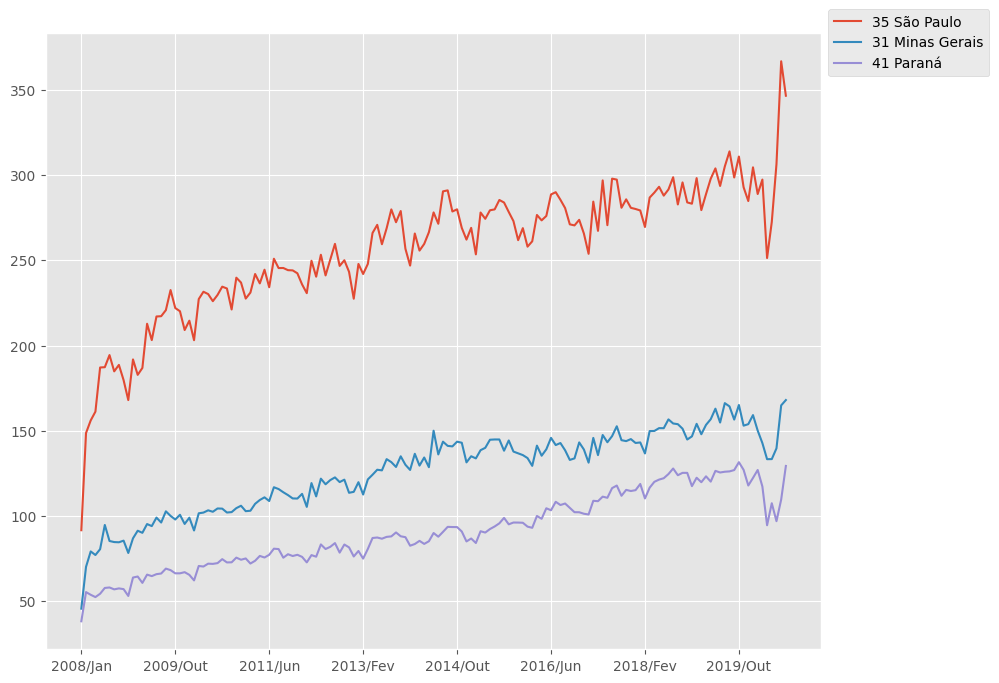

In [ ]:
data_ordered_by_total = data_ordered_by_total[data_ordered_by_total.columns[:-1]]
data_ordered_by_total.head(3).T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

Obs: cuidado com o que as alterações nos eixos (as janelas) causam, elas podem distorcer a proporção do que está sendo mostrado no gráfico, podendo deturpar a realidade.

Escolhendo os últimos 12 meses

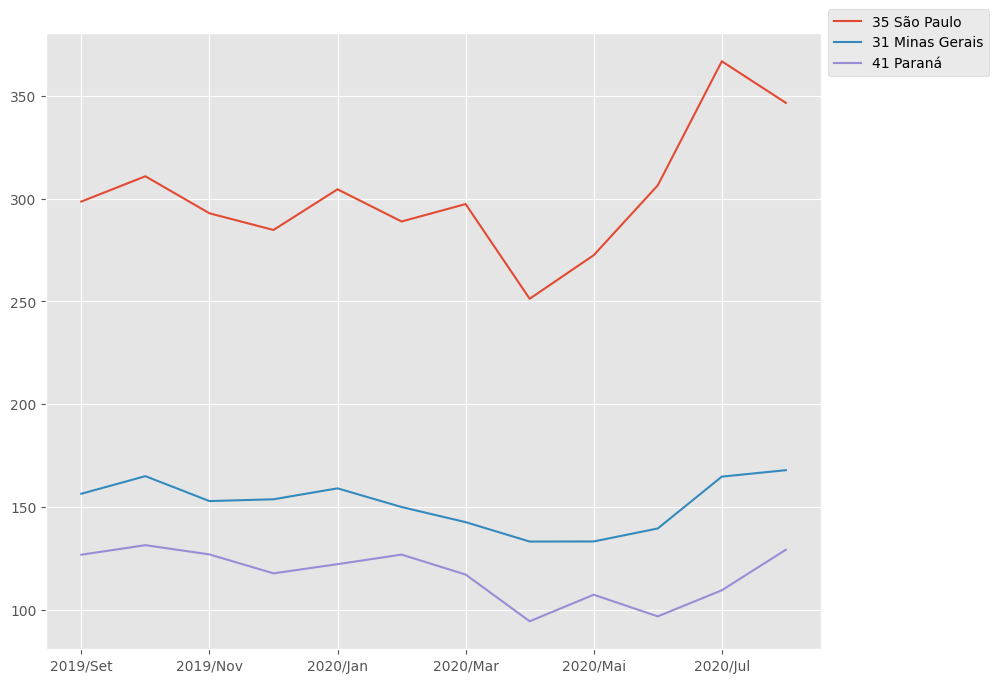

In [ ]:
data_ordered_by_total[data_ordered_by_total.columns[-12:]].head(3).T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

Escolhendo os últimos 24

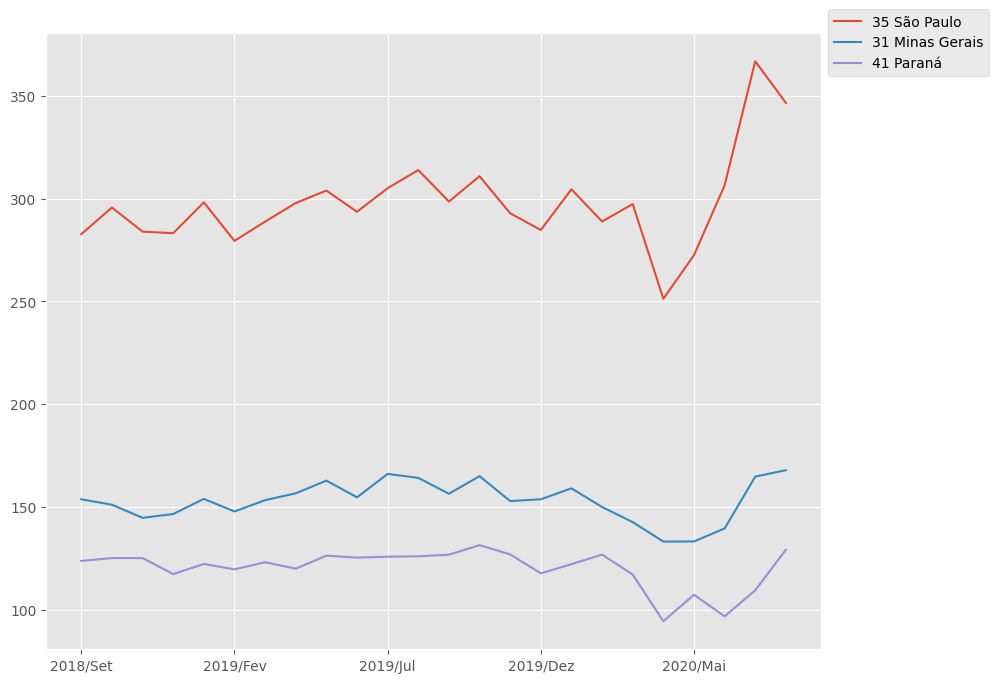

In [ ]:
data_ordered_by_total[data_ordered_by_total.columns[-24:]].head(3).T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

Escolhendo os últimos 36 meses

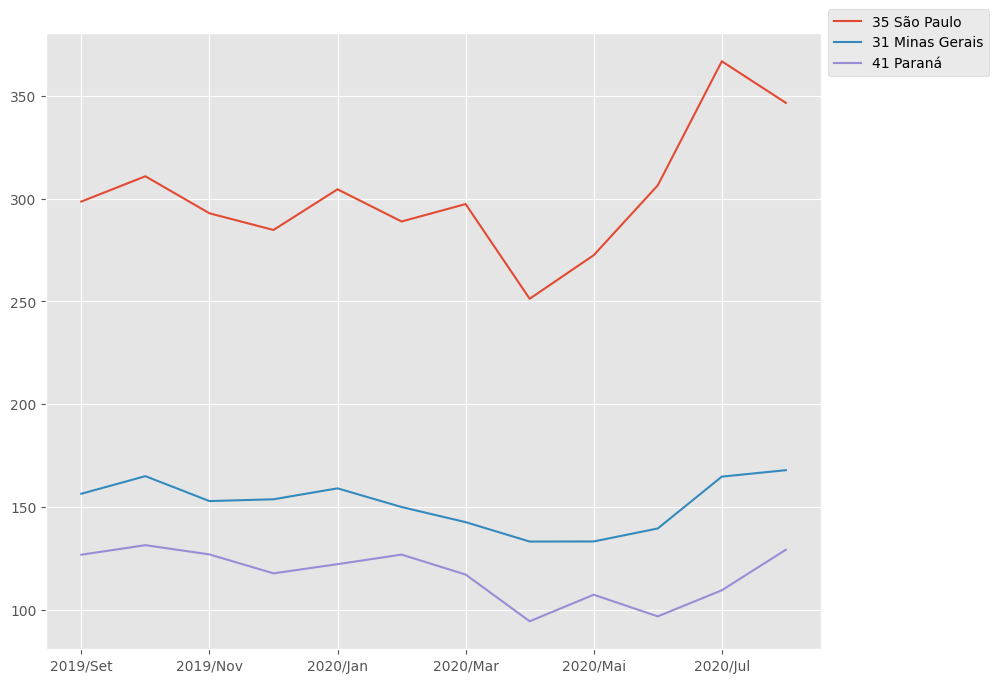

In [ ]:
data_ordered_by_total[data_ordered_by_total.columns[-12:]].head(3).T.plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

Sempre se questionar sobre alterações nos eixos do gráfico e nas escalas, pois podem trazer consigo o interesse em passar uma determinada mensagem.

Exemplo de alteração na escala. Na primeira imagem existe a impressão de que os gastos estão crescendo rapidamente

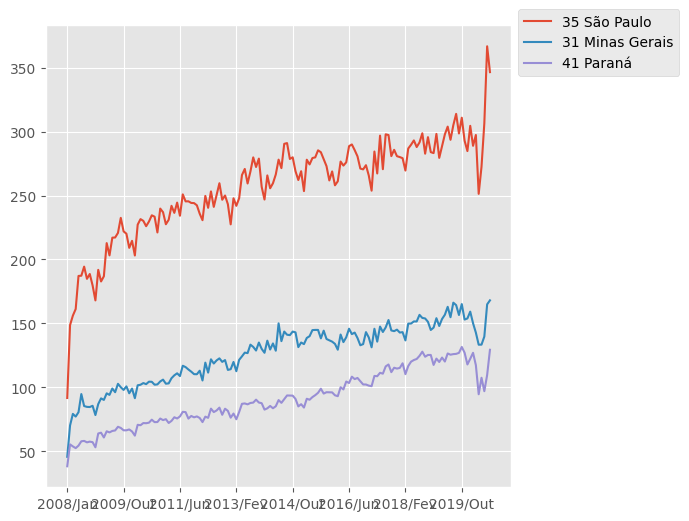

In [ ]:
data_ordered_by_total.head(3).T.plot(figsize=(6,6))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

Na segunda imagem parece que os gastos não crescem tão rapidamente

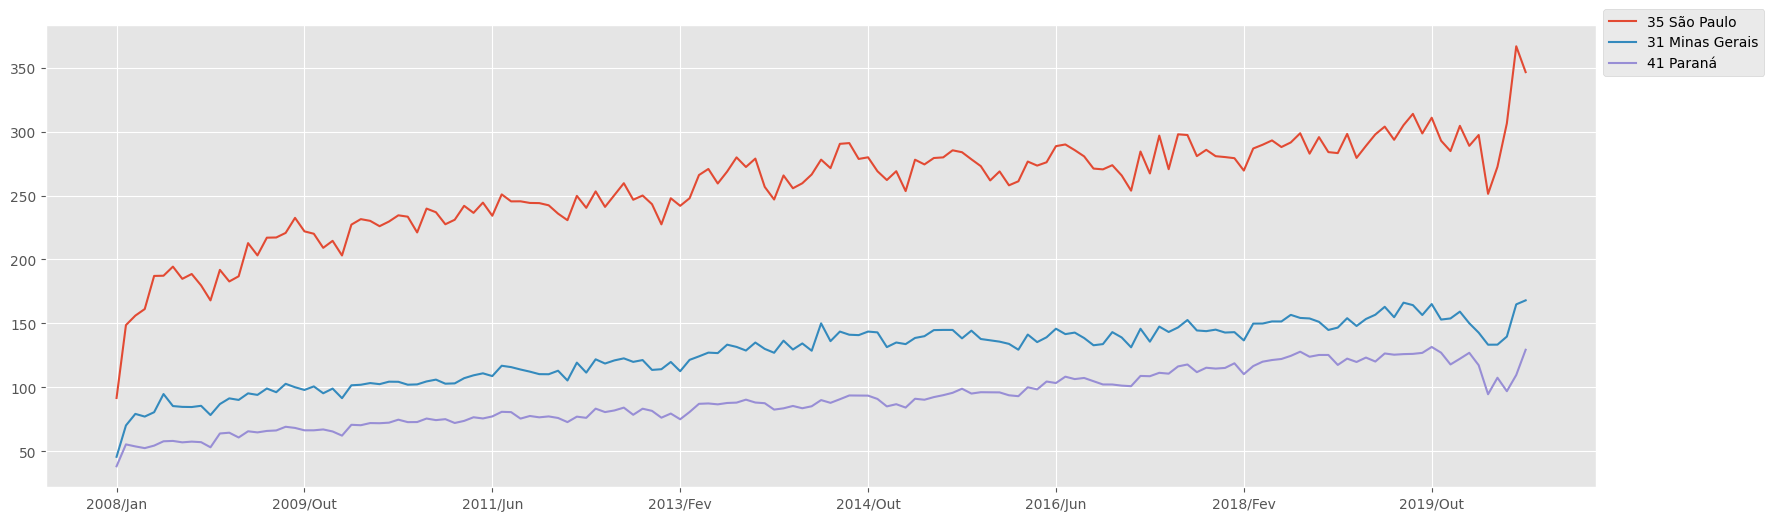

In [ ]:
data_ordered_by_total.head(3).T.plot(figsize=(20,6))
plt.legend(bbox_to_anchor=(1.0, 1.05), loc="upper left")

##Aula 5: Manipulação e interpretação de gráficos

In [ ]:
last_month = data_ordered_by_total.columns[-1]

In [ ]:
data_last_month = data_ordered_by_total[last_month]
data_last_month.head()

Unidade da Federação
35 São Paulo           346.51
31 Minas Gerais        168.02
41 Paraná              129.38
43 Rio Grande do Sul   101.37
33 Rio de Janeiro       95.27
Name: 2020/Ago, dtype: float64

Abaixo plotamos um gráfico de pizza e podemos listar os seguintes motivos pelos quais não é um bom gráfico para se usar.


*   Legenda horrível
*   Número de fatias muito grande, não conseguimos diferenciar muitos estados nem ter uma noção de diferença entre valores
*   Se os valores tiverem desordenados o gráfico fica pior ainda
*   Péssimo para comparação que era o fim desejado 


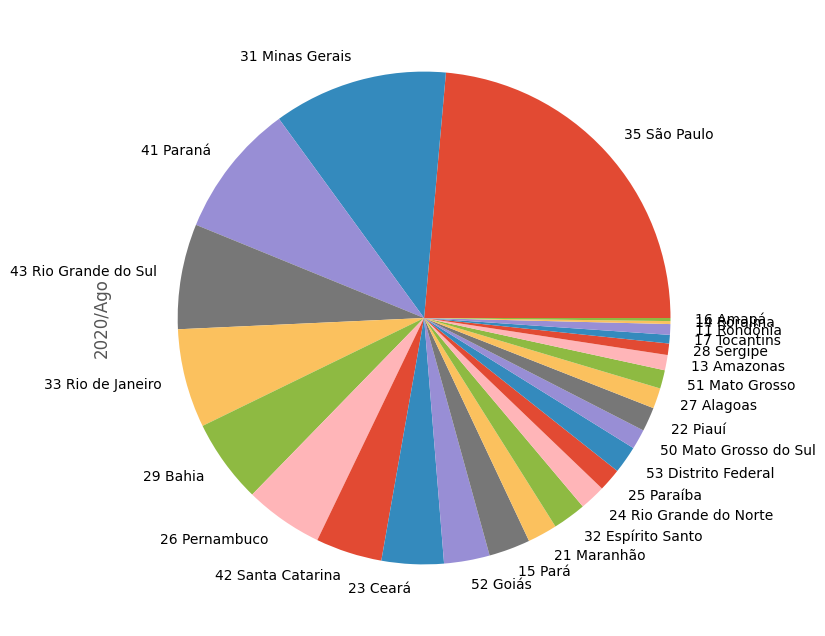

In [ ]:
axis = data_last_month.plot(kind="pie", figsize=(10,8))
plt.show()

Se nosso objetivo fose fazer alguma crítica sobre o quanto um estado está gastando a mais ou a menos que o outro, poderiamos utilizar a seguinte tabela

Em alguns momentos uma tabela pode representar melhor um dado do que um gráfico. O objetivo final deve ser passar a informação de uma forma clara e didática.

In [ ]:
(data_last_month / data_last_month.loc["33 Rio de Janeiro"]).head(10)

Unidade da Federação
35 São Paulo           3.64
31 Minas Gerais        1.76
41 Paraná              1.36
43 Rio Grande do Sul   1.06
33 Rio de Janeiro      1.00
29 Bahia               0.85
26 Pernambuco          0.79
42 Santa Catarina      0.67
23 Ceará               0.63
52 Goiás               0.46
Name: 2020/Ago, dtype: float64

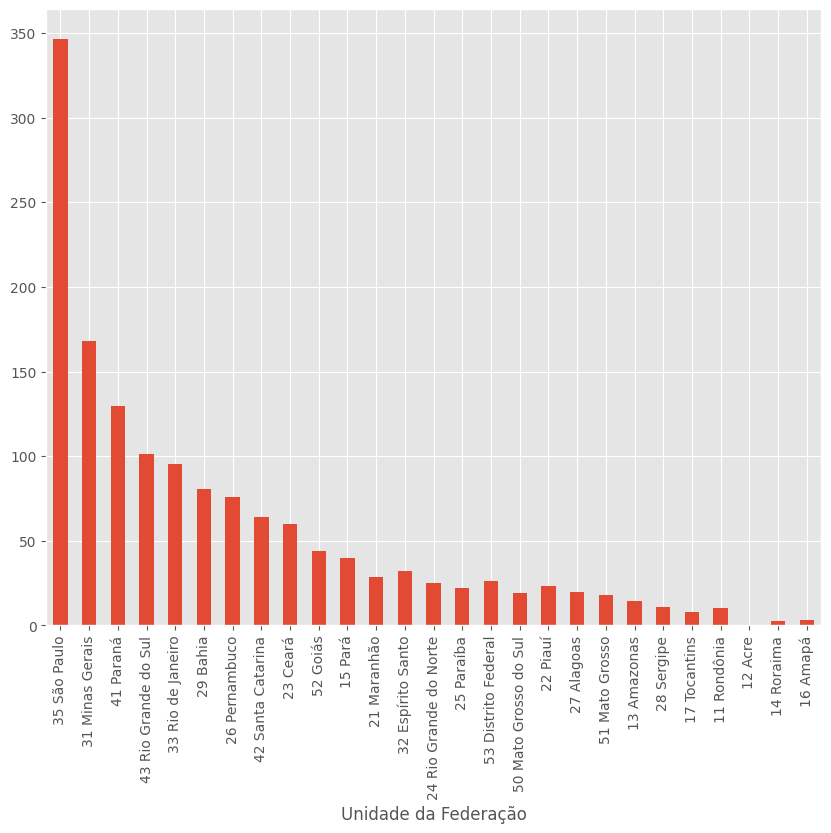

In [ ]:
axis = data_last_month.plot(kind="bar", figsize=(10,8))

Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

#Módulo 2: Tratamento, exploração e visualização de dados

##Aula 1: Fontes externas, limpeza e manipulação

O ideal é tomar cuidado quando se analisam números absolutos. Tudo que é absoluto desconsidera a relatividade das situações ous dos contextos

In [ ]:
spending_by_state = data_last_month / data_last_month.sum()

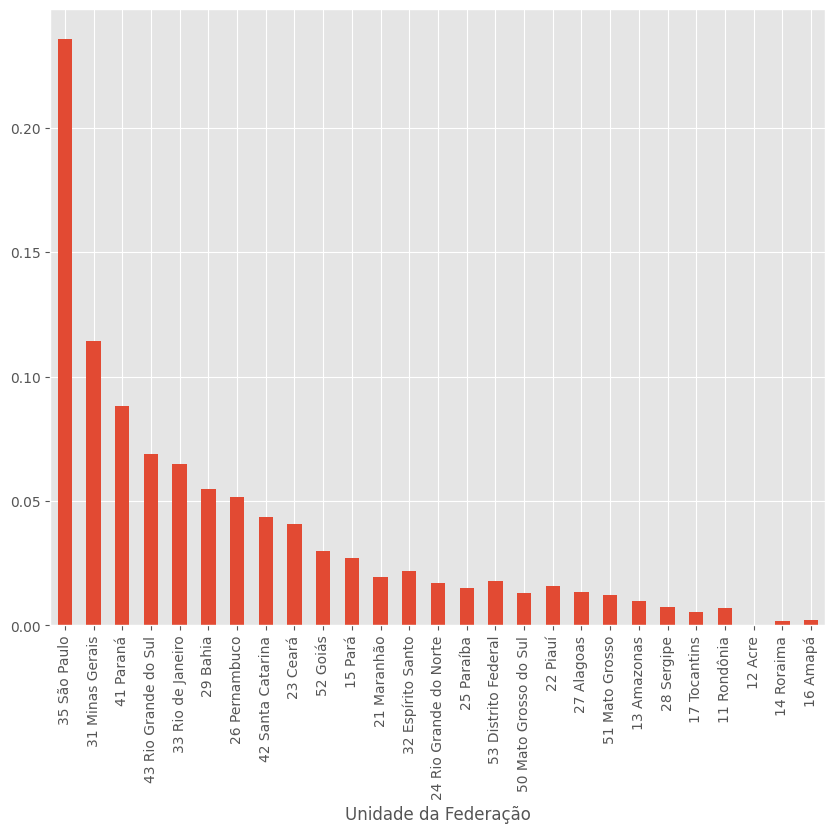

In [ ]:
axis = spending_by_state.plot(kind="bar", figsize=(10,8))

Agora vamos buscar as informações de população por estado. Para isto vamos tentar ler uma texto extraído do  wikipedia, que pode ser considerado como um arquivo csv separado por tabs, no caso do nosso exemplo.

Para ler multilinhas em python é necessário utilizar três ""


Fonte:https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [ ]:
population_data_string = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)
1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

In [ ]:
#o read_csv não suporta uma string de entrada, mas suporta um streming de dados

from io import StringIO

population_data_string_io = StringIO(population_data_string)
pd.read_csv(population_data_string_io,sep="\t")

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


###Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.


In [ ]:
population_data = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")[0]
population_data

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


###Desafio 02 - Neste desafio temos uma série de passos:



1.   Padronizar os nomes das colunas
2.   Transformar os dados nos tipos corretos
3.   Transformar a UF em index






Padronizando os nomes das colunas que serão utilizadas

In [ ]:
population_data.rename(columns={"Unidade federativa":"Unidade da Federação", "População":"Populacao"}, inplace=True)

Extraindo as colunas que interessam

In [ ]:
population_data = population_data[["Unidade da Federação", "Populacao"]]
population_data

,Unidade da Federação,Populacao
0,São Paulo,46 289 333
1,Minas Gerais,21 292 666
2,Rio de Janeiro,17 366 189
3,Bahia,14 930 634
4,Paraná,11 516 840
5,Rio Grande do Sul,11 422 973
6,Pernambuco,9 616 621
7,Ceará,9 187 103
8,Pará,8 690 745
9,Santa Catarina,7 252 502


Definindo um novo índice e  transformando os valores de object para int

In [ ]:
population_data = population_data.set_index("Unidade da Federação")

In [ ]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Populacao  27 non-null     object
dtypes: object(1)
memory usage: 432.0+ bytes


In [ ]:
population_data["Populacao"] = population_data["Populacao"].str.replace(" ", "")
population_data["Populacao"] = population_data["Populacao"].astype(int)
population_data

,Populacao
Unidade da Federação,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840
Rio Grande do Sul,11422973
Pernambuco,9616621
Ceará,9187103
Pará,8690745


In [ ]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


A segunda parte de aula terá continuação aqui, do desafio 2 pois será utilizado o dataset tratado aqui

In [ ]:
data_last_month.head()

Unidade da Federação
35 São Paulo           346.51
31 Minas Gerais        168.02
41 Paraná              129.38
43 Rio Grande do Sul   101.37
33 Rio de Janeiro       95.27
Name: 2020/Ago, dtype: float64

Vamos juntar as df dos dados de gastos do último mês com o de população.
Para isso vamos padronizar os nomes dos índices

In [ ]:
data_last_month.index

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')

In [ ]:
data_last_month.index = data_last_month.index.str[3:]

In [ ]:
data_last_month

Unidade da Federação
São Paulo             346.51
Minas Gerais          168.02
Paraná                129.38
Rio Grande do Sul     101.37
Rio de Janeiro         95.27
Bahia                  80.79
Pernambuco             75.70
Santa Catarina         63.97
Ceará                  59.81
Goiás                  43.98
Pará                   39.91
Maranhão               28.59
Espírito Santo         32.19
Rio Grande do Norte    24.93
Paraíba                22.13
Distrito Federal       26.53
Mato Grosso do Sul     19.24
Piauí                  23.21
Alagoas                19.75
Mato Grosso            17.79
Amazonas               14.73
Sergipe                11.01
Tocantins               8.24
Rondônia               10.29
Acre                    0.00
Roraima                 2.83
Amapá                   2.94
Name: 2020/Ago, dtype: float64

Problemas com espaços -> Método strip de strings arranca espaços do começo e do fim

In [ ]:
population_spending_data = population_data.join(data_last_month)
population_spending_data

,Populacao,2020/Ago
Unidade da Federação,,
São Paulo,46289333,346.51
Minas Gerais,21292666,168.02
Rio de Janeiro,17366189,95.27
Bahia,14930634,80.79
Paraná,11516840,129.38
Rio Grande do Sul,11422973,101.37
Pernambuco,9616621,75.70
Ceará,9187103,59.81
Pará,8690745,39.91


##Aula 2: Proporcionalidades e seaborn

O gráfico abaixo não faz sentido, pois estamos tentando mostrar de alguma forma a proporcionalidade entre duas grandezas diferentes (gastos e população) em um eixo apenas, ou seja, o eixo y está representando não só reais como também o número de pessoas. O gráfico passa a apresentar ao invés de 2 informações, 4 informações, o que não é bom e causa confusão na transmissão da informação.

Obs: sempre se perguntar: por que estou plotando essa informação? O que eu quero mostrar?

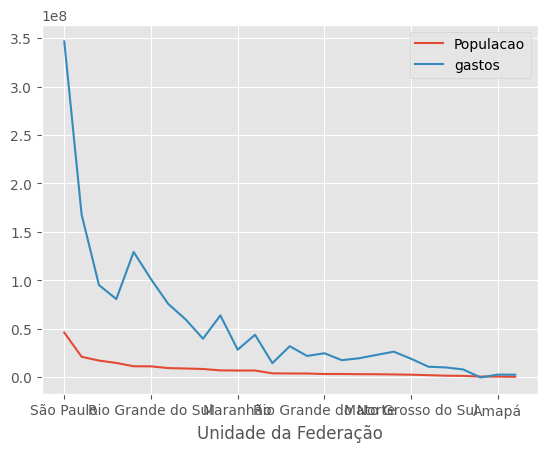

In [ ]:
population_spending_data["gastos"] = population_spending_data["2020/Ago"] * 1000000
population_spending_data[["Populacao", "gastos"]].plot()

Podemos representar a informação que queremos passar acima (proporcionalidade) por meio da divisão de gastos por habitante.
Podemos notar abaixo que São Paulo gasta aproximadamente a mesma coisa que o Rio Grande do Sul por habitante, mesmo com o gráfico acima não conseguindo passar esta informação como era o seu objetivo.

In [ ]:
population_spending_data[["Populacao", "gastos"]].loc[["Rio Grande do Sul", "São Paulo"]]

,Populacao,gastos
Unidade da Federação,,
Rio Grande do Sul,11422973,101374341.51
São Paulo,46289333,346512263.17


In [ ]:
population_spending_data["gasto_por_habitante"] = population_spending_data["gastos"] / population_spending_data["Populacao"]
population_spending_data.head()

,Populacao,2020/Ago,gastos,gasto_por_habitante
Unidade da Federação,,,,
São Paulo,46289333,346.51,346512263.17,7.49
Minas Gerais,21292666,168.02,168024412.95,7.89
Rio de Janeiro,17366189,95.27,95274486.35,5.49
Bahia,14930634,80.79,80793117.08,5.41
Paraná,11516840,129.38,129375911.54,11.23


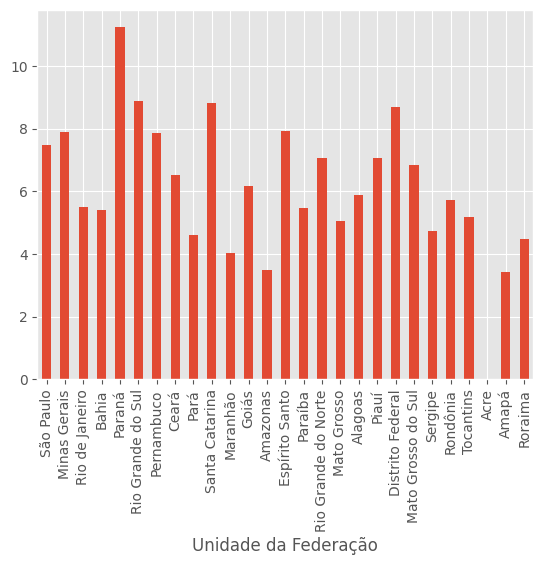

In [ ]:
population_spending_data["gasto_por_habitante"].plot(kind="bar")

Vamos começar a utiliza a biblioteca seaborn

In [ ]:
import seaborn as sns

O scatterplot é um bom gráfico para analisar a possível relação entre duas grandezas, como no caso abaixo: gasto e população.
Podemos observar que aparentemente existe uma relação: Estados com população maior gastam mais com procedimentos hospitalares.

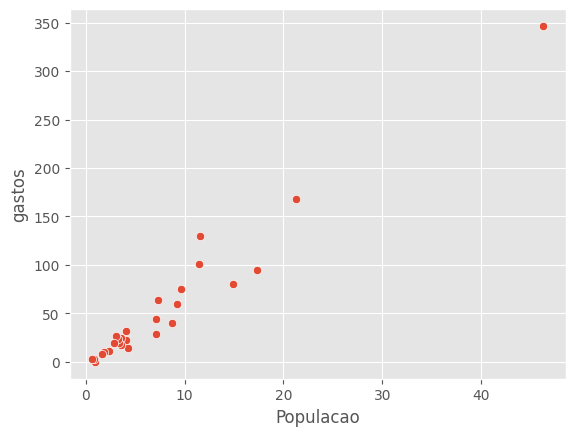

In [ ]:
sns.scatterplot(data=population_spending_data/1000000, x="Populacao", y="gastos")

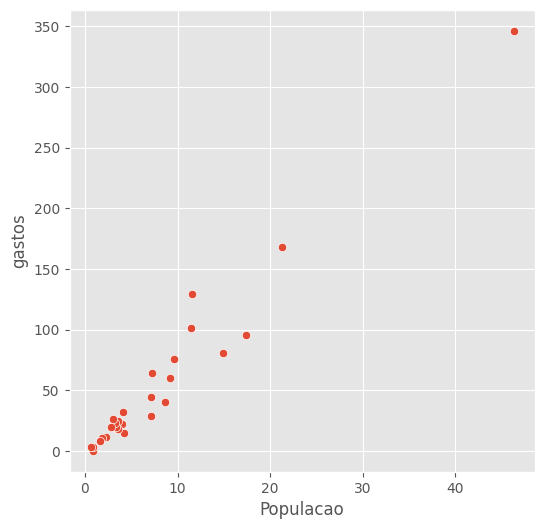

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=population_spending_data/1000000, x="Populacao", y="gastos")

Analisando o gráfico abaixo já não conseguimos enxergar a mesma relação. A medida que a população aumenta não necessariamente o gasto por habitante aumenta.

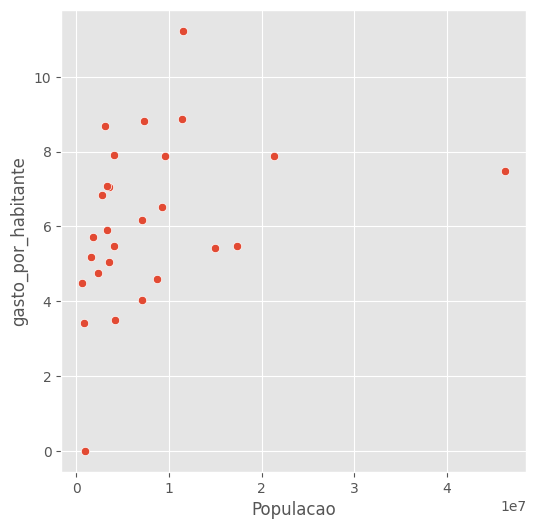

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=population_spending_data, x="Populacao", y="gasto_por_habitante")







ATENÇÃO: No próximo vídeo Gui e Thiago resolvem parte do Desafio 2 e 3, aconselhamos fortemente que gastem um tempo tentando resolver antes de assistir o vídeo.

Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

###Desafio 1: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

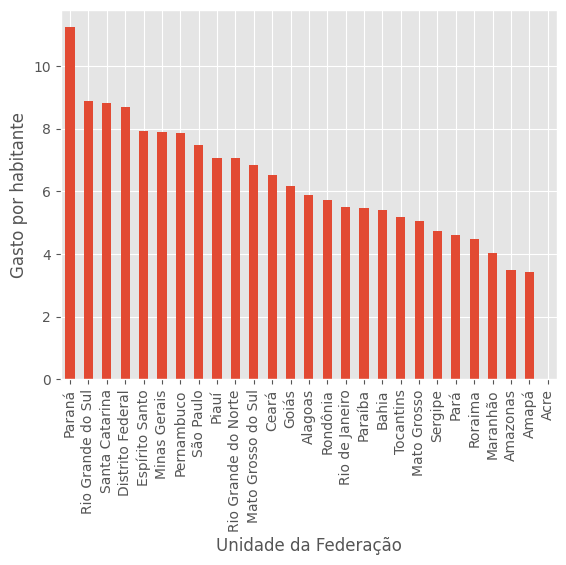

In [ ]:
# plt.style.use("ggplot")
ax = population_spending_data["gasto_por_habitante"].sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Gasto por habitante")
plt.show()

###Desafio 2 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

In [ ]:
population_data.head()

,Populacao
Unidade da Federação,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [ ]:
data_august = data_ordered_by_total[data_ordered_by_total.columns[-1]]
data_july = data_ordered_by_total[data_ordered_by_total.columns[-2]]
data_june = data_ordered_by_total[data_ordered_by_total.columns[-3]]

Temos um problema nos indexes do data_july e do data_june. Data august foi tratado em algum momento anteriormente. Vamos definir um padrão e atribuir aos três para evitar problemas durante a compilação

In [ ]:
index = data_ordered_by_total.index.str[3:]
data_august.index = index
data_july.index = index
data_june.index = index

In [ ]:
#Não podemos fazer o join de uma series com um data frame, mas sim o inverso.
population_spending_august_data = population_data.join(data_august)
population_spending_august_data["gastos"] = population_spending_august_data["2020/Ago"] * 1000000
population_spending_august_data["gasto_por_habitante"] = population_spending_august_data["gastos"] / population_spending_august_data["Populacao"]

population_spending_july_data = population_data.join(data_july)
population_spending_july_data["gastos"] = population_spending_july_data["2020/Jul"] * 1000000
population_spending_july_data["gasto_por_habitante"] = population_spending_july_data["gastos"] / population_spending_july_data["Populacao"]

population_spending_june_data = population_data.join(data_june)
population_spending_june_data["gastos"] = population_spending_june_data["2020/Jun"] * 1000000
population_spending_june_data["gasto_por_habitante"] = population_spending_june_data["gastos"] / population_spending_june_data["Populacao"]

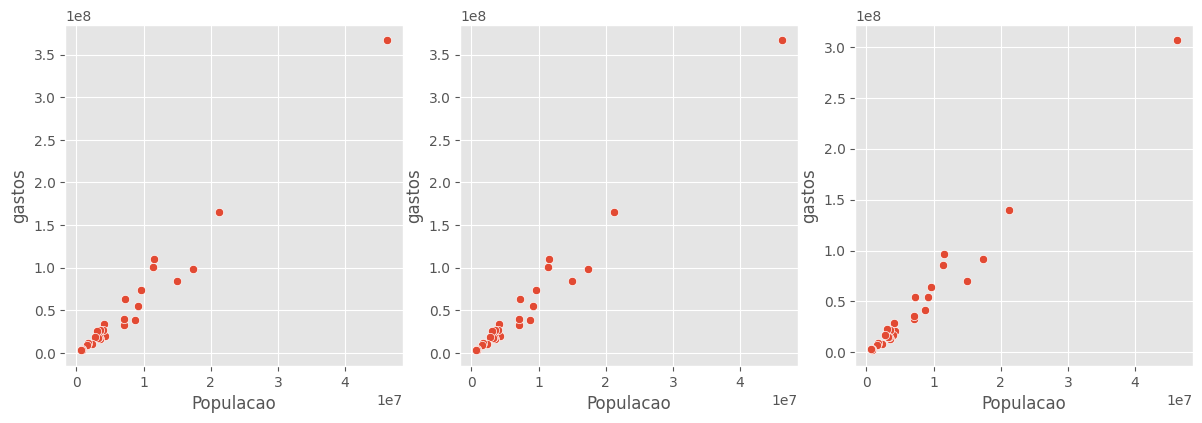

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig.tight_layout()
sns.scatterplot(ax = axes[0], data=population_spending_july_data, x="Populacao", y="gastos")
sns.scatterplot(ax = axes[1], data=population_spending_july_data, x="Populacao", y="gastos")
sns.scatterplot(ax = axes[2], data=population_spending_june_data, x="Populacao", y="gastos")
plt.show()

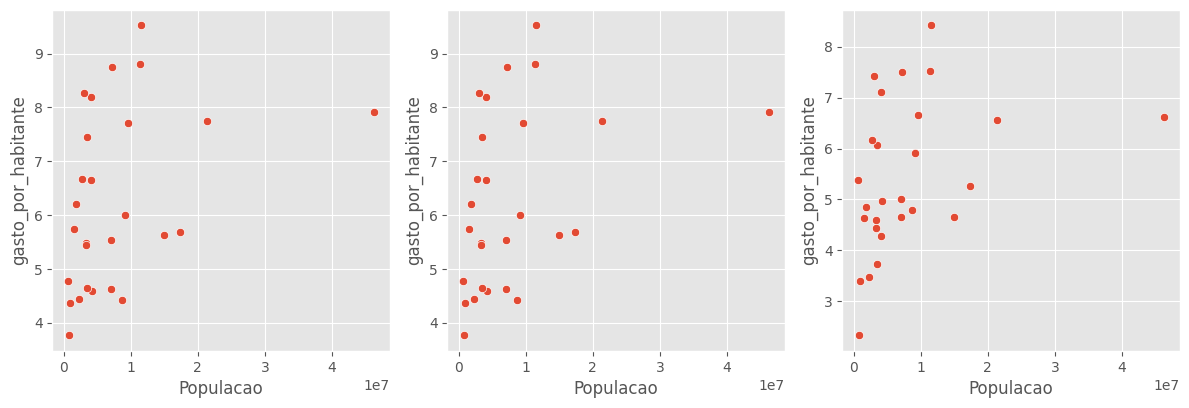

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
fig.tight_layout()
sns.scatterplot(ax = axes[0], data=population_spending_july_data, x="Populacao", y="gasto_por_habitante")
sns.scatterplot(ax = axes[1], data=population_spending_july_data, x="Populacao", y="gasto_por_habitante")
sns.scatterplot(ax = axes[2], data=population_spending_june_data, x="Populacao", y="gasto_por_habitante")
plt.show()

Analisando os dois gráficos acima chegamos as mesmas conclusões das aulas:

*   Parece existir uma relação entre o gastos com a população.
*   Não parece existir uma relação entre gasto por habitante e população. 



Desafio 3 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês corrente, analisar e compartilhar suas hipóteses.

,Populacao,2020/Jul
Unidade da Federação,,
São Paulo,46289333,366.72
Minas Gerais,21292666,164.89
Rio de Janeiro,17366189,98.72
Bahia,14930634,83.99
Paraná,11516840,109.66
Rio Grande do Sul,11422973,100.53
Pernambuco,9616621,74.19
Ceará,9187103,55.18
Pará,8690745,38.44
